## Data Splitting

In [65]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [66]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Import cleaned_data dataset
cleaned_data = pd.read_csv('cleaned_data.csv')

# Extract Response and Predictors
X, y = cleaned_data.iloc[:, :-1], cleaned_data.iloc[:, -1]

# Split the dataset into Train and Test
# Set random_state = integer for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Export train data to a csv
train = pd.concat([X_train, y_train], axis=1)
train.to_csv('train.csv')

# Export test data to a csv
test = pd.concat([X_test, y_test], axis=1)
test.to_csv('test.csv')

In [67]:
train.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2504,2504,0,44.0,0,0,0,4,1,127.21,29.8,2,0
3389,3390,0,31.0,0,0,1,4,0,75.82,29.1,1,0
3444,3445,0,41.0,0,0,1,4,1,103.79,28.6,1,0
2077,2077,1,74.0,0,0,1,4,0,65.28,28.2,1,0
4761,4762,0,76.0,1,0,1,5,1,78.68,23.3,1,0


## Data Resampling

In [68]:
# Install imblearn package 
# !pip install imblearn

# For oversampling
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

from collections import Counter
from numpy import where

#### Checking for class imbalance
Class imbalance is a problem in classification where the distribution of classes are skewed. When classifiers are faced with imbalanced datasets, where the number of negative instances far outnumbers the positive instances, the performance drops significantly.

First, we want to check for class imbalance in our cleaned dataset. The relevant classes are `stroke` and `no stroke`.

Class 0 (No stroke): 3900
Class 1 (Stroke): 187
Ratio: 20.86 : 1


<AxesSubplot:title={'center':'Stroke Count'}>

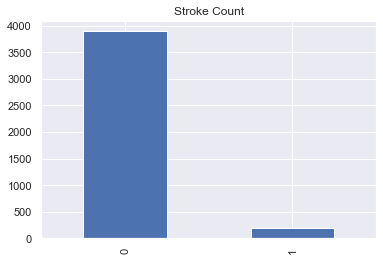

In [69]:
# Check how unbalanced the dataset is
stroke_count = train.stroke.value_counts()
print('Class 0 (No stroke):', stroke_count[0])
print('Class 1 (Stroke):', stroke_count[1])
print('Ratio:', round(stroke_count[0] / stroke_count[1], 2), ': 1')

stroke_count.plot(kind = 'bar', title = 'Stroke Count')

According to the graph above, the minority we identified in our train set is the class `stroke`, while the majority is the class `no stroke`. Moreover, the number of instances where the patient has stroke is far greater (20 times) as compared to that where the patient has no stroke. 
- This presents a problem because our machine learning would be trained to predict the majority class (which in this case is `no stroke`) rather than the minority class (`stroke`). 
- If it fails to capture the minority class, then it defeats our purpose of creating the model.

Therefore, we are adopting the technique of resampling to deal with our highly unbalanced dataset. The main technique we are applying would be to add more examples from the minority class, and this method is also known as "over-sampling".

### Resampling using Over-Sampling: SMOTE

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly by picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:
1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced

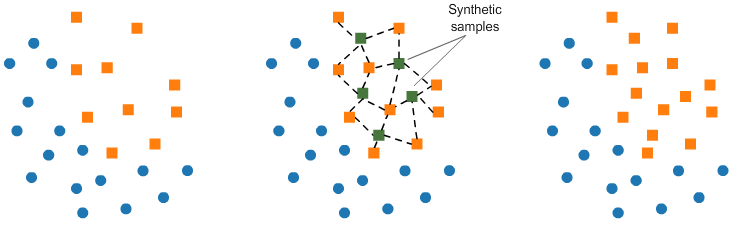

In [70]:
# Print number of samples in minority class
print("Class 0 represents 'no stroke', Class 1 represents 'stroke'")
beforecounter = Counter(y_train)
print('Before', beforecounter)

# Oversampling the train set using SMOTE
# Set random_state = integer for reproducibility
smt = SMOTE(random_state = 10)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

# Print number of samples after random oversampling
aftercounter = Counter(y_train_res)
print('After', aftercounter)

Class 0 represents 'no stroke', Class 1 represents 'stroke'
Before Counter({0: 3900, 1: 187})
After Counter({0: 3900, 1: 3900})


In [71]:
# Combine the resampled data to a single dataframe
oversampling_train = pd.concat([X_train_res, y_train_res], axis=1)

In [72]:
# Save the above as a csv
oversampling_train.to_csv('SMOTEoversampling_train.csv')

##### For visualisation purposes, we will plot the numeric variables on scatter plots to observe the change in data points after oversampling.

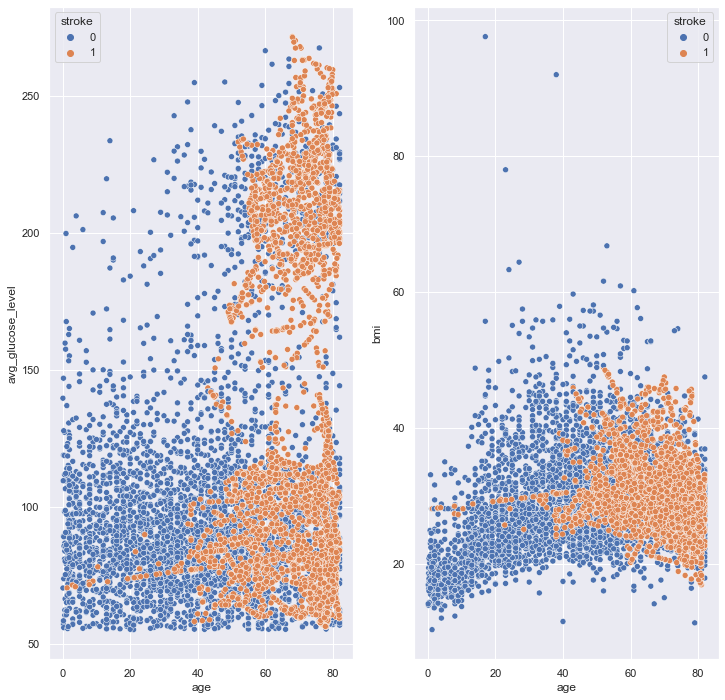

In [73]:
fig,ax = plt.subplots(1,2, figsize = (12,12))
sb.scatterplot(data = oversampling_train, x = 'age', y = 'avg_glucose_level', hue = 'stroke', ax=ax[0])
sb.scatterplot(data = oversampling_train, x = 'age', y = 'bmi', hue = 'stroke', ax = ax[1])
plt.show()

### Resampling using SMOTEENN

The ENN method works by finding the K-nearest neighbor of each observation first, then check whether the majority class from the observation’s k-nearest neighbor is the same as the observation’s class or not. If the majority class of the observation’s K-nearest neighbor and the observation’s class is different, then the observation and its K-nearest neighbor are deleted from the dataset.

This method combines the SMOTE ability to generate synthetic examples for minority class and ENN ability to delete some observations from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class. 

In [74]:
# Print number of samples in minority class
print("Class 0 represents 'no stroke', Class 1 represents 'stroke'")
beforecounter = Counter(y_train)
print('Before', beforecounter)

# Oversampling the train set using SMOTETomek
# Set random_state = integer for reproducibility
smt = SMOTEENN(random_state = 10)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

# Print number of samples after random oversampling
aftercounter = Counter(y_train_res)
print('After', aftercounter)

Class 0 represents 'no stroke', Class 1 represents 'stroke'
Before Counter({0: 3900, 1: 187})
After Counter({1: 3900, 0: 3892})


In [75]:
# Combine the resampled data to a single dataframe
oversampling_train = pd.concat([X_train_res, y_train_res], axis=1)

In [76]:
# Save the above as a csv
oversampling_train.to_csv('SMOTEENNoversampling_train.csv')

##### For visualisation purposes, we will plot the numeric variables on scatter plots to observe the change in data points after oversampling.

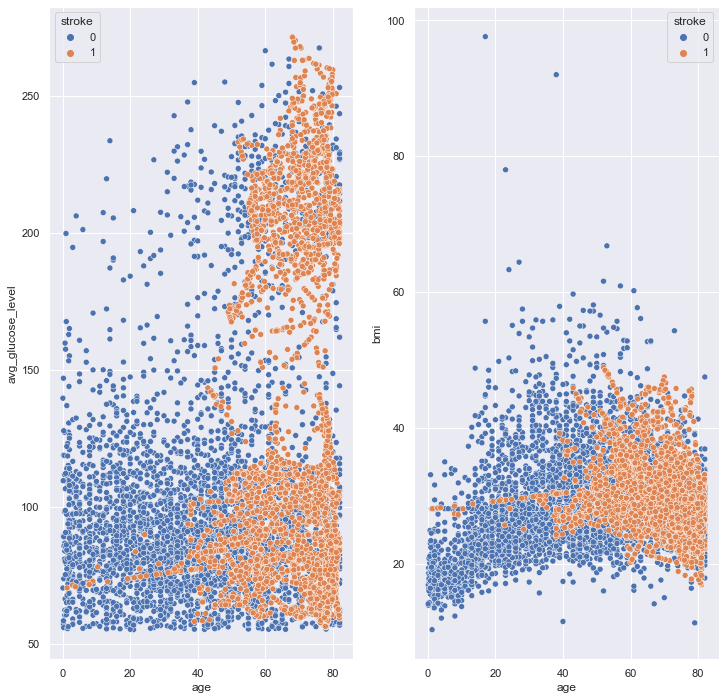

In [77]:
fig,ax = plt.subplots(1,2, figsize = (12,12))
sb.scatterplot(data = oversampling_train, x = 'age', y = 'avg_glucose_level', hue = 'stroke', ax=ax[0])
sb.scatterplot(data = oversampling_train, x = 'age', y = 'bmi', hue = 'stroke', ax = ax[1])
plt.show()

### Resampling using ADASYN

**ADASYN: Adaptive Synthetic Sampling Approach for imbalanced learning**

ADASYN is similar to SMOTE, and derived from it, featuring just one important difference. it will bias the sample space (that is, the likelihood that any particular point will be chosen for duping) towards points which are located not in homogenous neighborhoods.

In [78]:
# Print number of samples in minority class
beforecounter = Counter(y_train)
print('Before', beforecounter)

# Oversampling the train set using ADASYN
# Set random_state = integer for reproducibility
adasyn = ADASYN(random_state=10)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Print number of samples after random oversampling
aftercounter = Counter(y_train_res)
print('After', aftercounter)

Before Counter({0: 3900, 1: 187})
After Counter({1: 3902, 0: 3900})


In [79]:
# Combine the resampled data to a single dataframe
oversampling_train = pd.concat([X_train_res, y_train_res], axis=1)

In [80]:
# Save the above as a csv
oversampling_train.to_csv('ADASYNoversampling_train.csv')

##### For visualisation purposes, we will plot the numeric variables on scatter plots to observe the change in data points after oversampling.

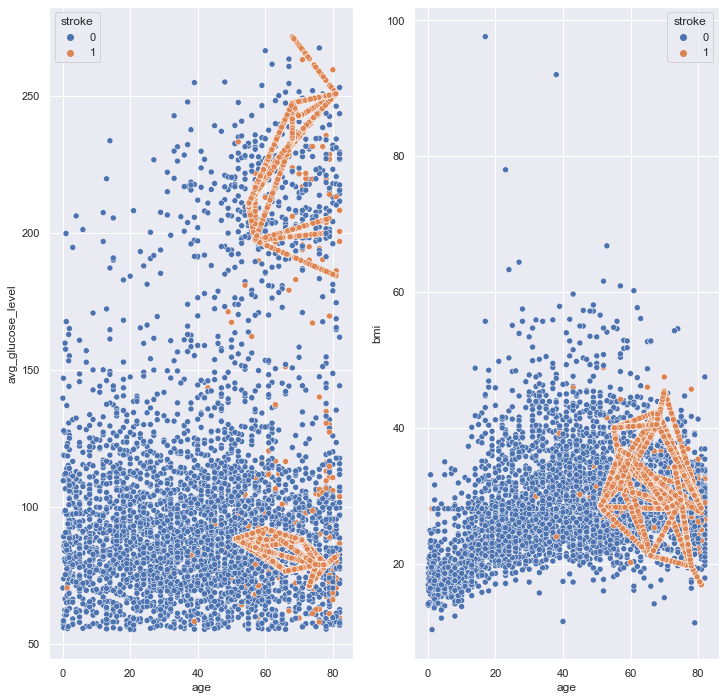

In [81]:
fig,ax = plt.subplots(1,2, figsize = (12,12))
sb.scatterplot(data = oversampling_train, x = 'age', y = 'avg_glucose_level', hue = 'stroke', ax=ax[0])
sb.scatterplot(data = oversampling_train, x = 'age', y = 'bmi', hue = 'stroke', ax = ax[1])
plt.show()

## Summary of Resampled data

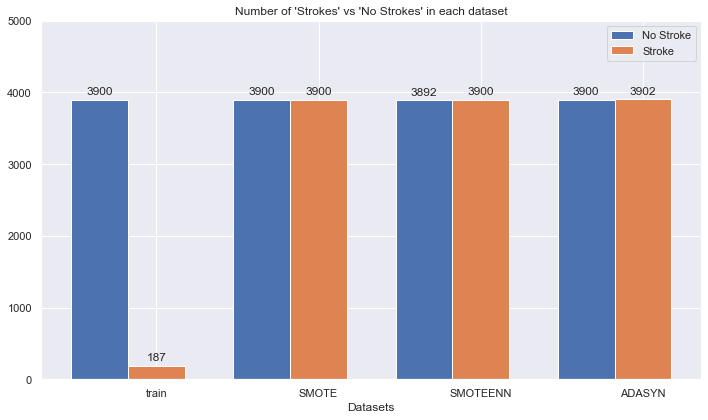

In [82]:
sets = ['train', 'SMOTE', 'SMOTEENN', 'ADASYN']
stroke_count = [187, 3900, 3900, 3902]
nostroke_count = [3900, 3900, 3892, 3900]

x = np.arange(len(sets))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize = (10,6))
ax.set_ylim([0, 5000])

rects1 = ax.bar(x - width/2, nostroke_count, width, label = 'No Stroke')
rects2 = ax.bar(x + width/2, stroke_count, width, label = 'Stroke')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Datasets")
ax.set_title("Number of 'Strokes' vs 'No Strokes' in each dataset")
ax.set_xticks(x + width/2)
ax.set_xticklabels(sets)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## References

- https://elitedatascience.com/imbalanced-classes
- https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook